# Assignment 9: Bayesian Analysis

### Conditional Probability 

Q.1. Let's say there are about 8.6 million people living in New-York and about 56 % of them speak Spanish. Let's also assume there are about 7.5 billion people on earth.

If I randomly pick someone living on Earth (an Earthian?), what are the chances that this person is a Spanish speaking New-Yorker?  
*
p(living in NYC | earth) = 8,600,000/7,500,000,000 = 0.0011  
p(spanish | living in NYC) = .56  
p(living in NYC | earth) x p(spanish | living in NYC) = .56 x 0.0011 = 0.0006*

Q.2 Explain in few terms what is Naive Bayes. What is it considered Naive?

*Naive Bayes is a classification model.  More specifically a probabilistic classifier that utilizes Bayes theorem to classify the observation. It is considered naive because the model assumes that all of the input features are independent of each other.* 

Q.3 Let's suppose we have a Deck of Cards (52 cards). We pick a card at random. What is the probability of the card we picked being a king, given that it is a face card.  

*We will consider face cards to be J, Q, K, A so there are 16 face cards in a deck.
there are 4 kings in the deck.  
p(k|f) = 4/16 = 1/4*

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('shingles.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1841 entries, 0 to 1840
Data columns (total 6 columns):
Rash                       1841 non-null object
SwollenLymphNode           1841 non-null object
Chills                     1841 non-null object
PolymeraseChainReaction    1841 non-null object
VZVAntibodyTest            1841 non-null object
Blisters                   1841 non-null object
dtypes: object(6)
memory usage: 86.4+ KB
None


,Rash,SwollenLymphNode,Chills,PolymeraseChainReaction,VZVAntibodyTest,Blisters
0,no,no,no,no,pos,no
1,yes,no,no,no,neg,no
2,no,no,no,no,neg,no
3,no,no,no,no,neg,no
4,no,no,no,no,neg,no


Q.4. Does this data contain any missing values?

In [3]:
data.isnull().sum()

Rash                       0
SwollenLymphNode           0
Chills                     0
PolymeraseChainReaction    0
VZVAntibodyTest            0
Blisters                   0
dtype: int64

In [4]:
# Check how the categories are labled
data.apply(pd.value_counts)

,Rash,SwollenLymphNode,Chills,PolymeraseChainReaction,VZVAntibodyTest,Blisters
neg,NaN,NaN,NaN,NaN,1065.0,1131
no,960.0,1124.0,925.0,1046.0,NaN,437
po,NaN,NaN,NaN,NaN,NaN,1
pos,NaN,NaN,NaN,NaN,775.0,8
yes,881.0,717.0,916.0,795.0,1.0,264


We didn't see any null values but we did see inconsistencies in how the data is categorized.  We will make the categorization consistent before we continue with the analysis. All of the no values will be converted to zero and positive values will be converted to one. 

In [5]:
# Define a funtion to make categories consistent and binaryn
def consistent_categories(x):
    if x in ['neg', 'no']:
        return 0
    elif x in ['po', 'pos', 'yes']:
        return 1

# Apply the function to each column in the data frame. 
for col in data.columns:
    data[col] = data[col].apply(consistent_categories)

In [6]:
# Check that our data set has consistent categories.  
data.apply(pd.value_counts)

,Rash,SwollenLymphNode,Chills,PolymeraseChainReaction,VZVAntibodyTest,Blisters
0,960,1124,925,1046,1065,1568
1,881,717,916,795,776,273


Q.5. Split the data into 70/30 train test  
*The lack of documentation and an inability to find the source of the data means it is difficult to determine which variable is the target variable. As a result I selected the `VZVAntibodyTest` as my response.  It is likely that this test is used by medical professionals to diagnose shingles.  We therefore want to see if other symptoms can be used to accurately determine the results of the antibody test.
*

In [7]:
# Set Up Features
feature_cols = ['Rash', 'SwollenLymphNode', 'Chills',
                'PolymeraseChainReaction', 'Blisters']

features = data.loc[:, feature_cols]

# Set Up Target Variable
target = data['VZVAntibodyTest'].values

# Split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(features,
                                                   target,
                                                   test_size = .30,
                                                   train_size = .70,
                                                   random_state = 42)

Q.6. Train a Gaussian Naive Bayes model, a Multinomial Naive Bayes and a Bernoulli Naive Bayes on the dataset. Compute the accuracy for each. Explain your results. 

### Gaussian Model

In [8]:
# Set Up Gaussian Model Object and fit the model
gaussian = GaussianNB()
gaussian_model = gaussian.fit(x_train, y_train)

Gaussian NB Accuracy:0.61


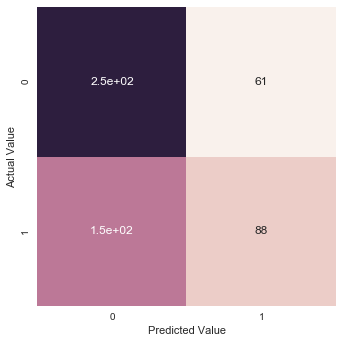

In [9]:
# Evaluate the model accuracy with the testing data.
gaussian_y_pred = gaussian_model.predict(x_test)
guassian_accuracy = accuracy_score(y_test, gaussian_y_pred)
print('Gaussian NB Accuracy:{}'.format(guassian_accuracy.round(2)))

# Create Confusion Matrix
guassian_confusion = pd.DataFrame(confusion_matrix(y_test, gaussian_y_pred))

# Plot the Confusion Matrix
sns.heatmap(guassian_confusion, square=True, annot=True, cbar=False)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

Given that our predictor variables are not continuous we would not expect the Gaussian Naive Bayes model to perform all that well.  Our model has an overall accuracy of 0.61.  Looking at the confusion matrix we see that the model has a significant number of false negatives.  

## Multinomial Model

In [10]:
# Set up multinomial naive bayes object and fit the model.
multi = MultinomialNB()
multi_model = multi.fit(x_train, y_train)

Multinomial NB Accuracy:0.57


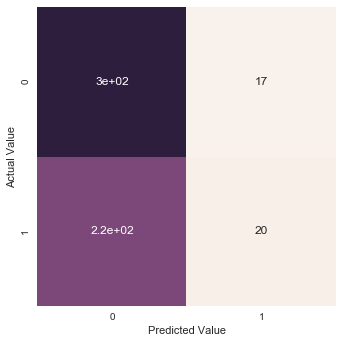

In [11]:
# Evalutate the accuracy of the mode with testing data
multi_y_pred = multi_model.predict(x_test)
multi_accuracy = accuracy_score(y_test, multi_y_pred)
print('Multinomial NB Accuracy:{}'.format(multi_accuracy.round(2)))

# Create a confusion matrix
multi_confusion = pd.DataFrame(confusion_matrix(y_test, multi_y_pred))

# Plot the confusion matrix
sns.heatmap(multi_confusion, square=True, annot=True, cbar=False)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

The multinomial model does not perform as well as the Gaussian model.  The accuracy of the model is only 57% and again has a high number of false negatives.  

As with our Gaussian model our input data is not well suited for a multinomial model. A multinomial model expects that our input variables are counts or frequencies.  This makes the multinomial naive Bayes very popular with text classification.  

In [12]:
# Set up bernoulli model object.  We don't need to binarize our data since it is
# already in a binary format. Our variables are either yes or no for each 
# category. 
bernoulli = BernoulliNB(binarize = None)
bernoulli_model = bernoulli.fit(x_train, y_train)

Bernoulli NB Accuracy:0.62


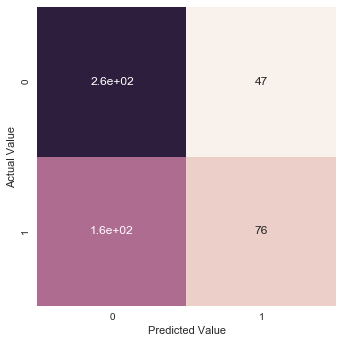

In [13]:
ber_y_pred = bernoulli_model.predict(x_test)
ber_accuracy_score = accuracy_score(y_test, ber_y_pred)


print('Bernoulli NB Accuracy:{}'.format(ber_accuracy_score.round(2)))

# Create a confusion matrix
ber_confusion = pd.DataFrame(confusion_matrix(y_test, ber_y_pred))

# Plot the confusion matrix
sns.heatmap(ber_confusion, square=True, annot=True, cbar=False)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

The Bernoulli model performs the best of the three models we fit.  It has the highest accuracy at 0.62.  This is only marginally better than the Gaussian model we developed.  When we look at the confusion matrix me still see that the model produces a large number of false negatives.  In real world terms this means that if we try to diagnose shingles from symptoms other than the antibody test we would miss many cases of shingles.  

## Inference in Bayesian networks

Q.7. Imagine you are at party on Sunday and have an exam on Monday.  If you drink
too much alcolhol at the birthday party, you most likely have problems concentrating the next day, which
would reduce the probability that you pass the exam.  Another consequence of the reduced concentration
might be increased stress with your roommate.

Consider the following random variables that can assume the values "true" or "false":
A:  drinking too much alcolhol on Sunday;
B:  Dairy allergy strikes;
C:  reduced concentration on Monday;
D:  you pass the exam;
E:  stress with your roommates.

a) Draw the corresponding Bayesian network.

b) Search for conditional dependencies and independencies.

![](https://www.dropbox.com/s/gf320ath5m9d31n/Slide1.png?dl=0)

### Answer
[Link To Network Graph](https://www.dropbox.com/s/qa0blvb9zdksnhr/Slide1.jpg?dl=0)  
Looking at the Bayesian network we see that passing the exam and having increased tension with the roommate share a common cause.  This makes them conditionally independent.  

Our reduced concentration variable is a common effect of drinking too much and having problems with the dairy allergy.  This means the parent nodes are marginally independent.  If we have knowledge regarding our concentration variable they become conditionally dependent. 